In [1]:
#We are testing a DL model for Mixed integer formulation for Water distribution network.
# The input data such as water demand and time-ahead dynamic energy prices are obtained from Singh et al (2019) paper.
# We computed the time ahead pump switching using MATALB Gurobi solver
# We obtained the time ahead pump switching for 2048 hours (85.33 days)
# We train_test the neural network in the ratio of 80-20.
# The nn is trained using ReLu and SoftMax (as the output is integer values)

#In our  case y is (z)

import numpy as np
import pandas as pd   #data analysis and manipulation library
import seaborn as sns #Python statistical data visualization library.
import matplotlib.pyplot as plt
from sklearn import model_selection #Tuning the hyperparameters, cross validation, model persistance are the important aspects of this.
from sklearn.model_selection import train_test_split #ML library to data analysis
from sklearn.metrics import accuracy_score, r2_score
import sklearn.metrics as metrics
from openpyxl import Workbook, load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows


from sklearn.decomposition import PCA #dimensionality reduction

%matplotlib inline

#Libraries for Deep learning framework from Keras

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import BatchNormalization

import keras
import keras.utils
from keras import utils as np_utils
from keras.models import Sequential

from tensorflow.keras import layers
from tensorflow.keras import utils as np_utils
from tensorflow.keras import models 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, LeakyReLU, PReLU, ELU #Import activation functions from keras.layers
from tensorflow.keras.layers import Dropout #Import dropout library, the objective of dropout is to prevent overfitting of data, However, we have to be careful while setting the dropout rate.
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler #Learning rate scheduler, Here call back is an object that can perform
                                                # at various actions at different stages of training 
from tensorflow.keras.callbacks import History #We can use the data collected from history to  [accuracy, loss, val_accuracy, val_loss]



import io #Deal with various types of input output
import os #Talk with os, like changing and modifying dirctories
import requests #Allow you to send HTTP/1.1, headers, form data, multipart files r = requests.get(‘https://github.com/timeline.json’)


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning) #Deprecated warning: it is a base category of warning about deprecated features


import dill
# dill.dump_session('notebook_env.db')


Using TensorFlow backend.


In [2]:
pwd


'C:\\Users\\jyotib18\\OneDrive - Universitetet i Agder\\Data Files From Rahul'

In [3]:
import io
#inputs = pd.read_csv(io.BytesIO(uploaded['1.csv']))

inputs=pd.read_csv(r'C:\Users\jyotib18\OPS_Data\2T10Ts5\feasible_input_log.csv')
inputs=inputs.dropna()


# Dataset is now stored in a Pandas Dataframe
inputs.shape

(187030, 63)

In [4]:
type(inputs)

pandas.core.frame.DataFrame

In [5]:
inputs.head

<bound method NDFrame.head of         82.588  76.983  1  1.1  0  1.2  4  0.1  1.3  1.4  ...   14.311  \
0       47.980  70.289  1    1  0    0  3    1    1    1  ...   9.4275   
1       48.068  68.472  0    0  0    1  1    0    1    0  ...   6.3192   
2       58.047  67.258  1    0  0    0  0    0    0    0  ...   5.5174   
3       80.493  80.657  1    1  0    0  5    1    1    1  ...   6.1528   
4       66.843  65.017  0    1  0    0  3    1    1    0  ...  11.7370   
...        ...     ... ..  ... ..  ... ..  ...  ...  ...  ...      ...   
187025  81.582  43.692  1    1  0    0  4    1    1    1  ...  17.8660   
187026  41.892  93.675  0    0  1    1  1    1    0    0  ...  14.3480   
187027  52.809  54.443  1    1  0    0  1    0    0    0  ...  12.9560   
187028  61.490  53.179  1    0  1    1  4    1    1    1  ...  11.6330   
187029  99.098  98.227  0    1  0    0  3    0    1    0  ...   9.2793   

          10.979  10.157    10.56    12.716    13.39    5.8478   16.819  \
0     

In [6]:
import io
outputs = pd.read_csv(r'C:\Users\jyotib18\OPS_Data\2T10Ts5\feasible_output_log.csv')
# Dataset is now stored in a Pandas Dataframe
outputs=outputs.dropna()
outputs.shape

(187030, 40)

In [7]:
outputs.head

<bound method NDFrame.head of         1   -0  -0.1  -0.2  -0.3  -0.4  1.1  -0.5  -0.6  0  ...  1.4  -0.22  \
0       1  0.0   0.0   0.0   0.0   1.0  0.0   1.0   1.0  0  ...    0      0   
1       0  0.0   0.0   1.0  -0.0   0.0 -0.0   0.0   0.0  0  ...    1      0   
2       1  0.0  -0.0   1.0  -0.0   0.0  0.0   0.0   0.0  0  ...    0      0   
3       1 -0.0  -0.0   0.0  -0.0  -0.0 -0.0   1.0  -0.0  0  ...    0      0   
4       0 -0.0  -0.0   0.0  -0.0  -0.0 -0.0   1.0  -0.0  0  ...    0      0   
...    ..  ...   ...   ...   ...   ...  ...   ...   ... ..  ...  ...    ...   
187025  1  0.0  -0.0   0.0   0.0  -0.0  1.0  -0.0   0.0  0  ...    0      0   
187026  0  0.0  -0.0   0.0   0.0  -0.0 -0.0  -0.0   1.0  0  ...    1      1   
187027  1  0.0   1.0   0.0   0.0   1.0 -0.0  -0.0   0.0  0  ...    0      0   
187028  1  0.0   0.0   1.0   0.0   0.0  0.0   0.0   0.0  0  ...    1      0   
187029  0  0.0  -0.0   0.0   0.0   1.0  0.0   0.0   0.0  0  ...    0      0   

        -0.23  -0.24 

In [8]:
x = inputs.values #converting data frame to array frame
x

array([[47.98  , 70.289 ,  1.    , ..., 14.123 , 13.57  , 18.395 ],
       [48.068 , 68.472 ,  0.    , ...,  1.4884, 14.428 ,  7.9445],
       [58.047 , 67.258 ,  1.    , ..., 16.343 ,  8.3626,  2.8701],
       ...,
       [52.809 , 54.443 ,  1.    , ..., 14.262 ,  4.4822, 13.647 ],
       [61.49  , 53.179 ,  1.    , ...,  6.4388,  7.3219,  7.143 ],
       [99.098 , 98.227 ,  0.    , ...,  1.5657,  5.8528,  5.9131]])

In [9]:
type(outputs)

pandas.core.frame.DataFrame

In [10]:
y = outputs.values # converting dataframe "outputc" in array form i.e. 'y' is now in array form 
y # y is combination of power assignments and channel assignments both.

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0., -0., ...,  0.,  1.,  0.],
       ...,
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0., -0., ...,  0.,  0.,  0.]])

In [11]:
y.shape

(187030, 40)

In [12]:
x.shape

(187030, 63)

In [13]:
type(y)

numpy.ndarray

In [14]:
#y[0]

In [15]:
#y[0:50, 0] # First row and initial 50 columns of y 

In [16]:
# Splitting data for training and testing 
# Here both x and y are in array form (non-scaled)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False, random_state=42) # old
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
x_train.shape

(168327, 63)

In [19]:
x.shape[1]

63

In [20]:
#Building neural network


model = tf.keras.Sequential()


model.add(Dense(20, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal')) # Input layer and 1st hidden layer
model.add(BatchNormalization())


#model.add(Dense(20, input_dim=x.shape[1], kernel_initializer='random_normal')) # Input layer and 1st hidden layer
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 1st hidden layer
#model.add(BatchNormalization())


model.add(Dense(20, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(Dense(100,  kernel_initializer='random_normal')) # 2nd Hidden layer
model.add(BatchNormalization())
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 2nd hidden layer


#model.add(Dense(40, kernel_initializer='random_normal')) # 3rd Hidden layer 
model.add(Dense(40, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 3rd hidden layer
model.add(BatchNormalization())


#model.add(Dense(60,  kernel_initializer='random_normal')) # 4th Hidden Layer 
model.add(Dense(60, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 4th hidden layer
model.add(BatchNormalization())

#model.add(Dense(80, kernel_initializer='random_normal')) # 5th Hidden Layer
model.add(Dense(80, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 5th hidden layer
model.add(BatchNormalization())

#model.add(Dense(100, kernel_initializer='random_normal')) # 6th Hidden layer
model.add(Dense(100, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 6th hidden layer
model.add(BatchNormalization())

#model.add(Dense(80, kernel_initializer='random_normal')) # 7th Hidden Layer 
model.add(Dense(80, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 4th hidden layer
model.add(BatchNormalization())


#model.add(Dense(60, kernel_initializer='random_normal')) # 7th Hidden Layer 
model.add(Dense(60, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 4th hidden layer
model.add(BatchNormalization())

model.add(Dense(40, input_dim=x.shape[1], activation='relu', kernel_initializer='random_normal'))
#model.add(Dense(40, kernel_initializer='random_normal')) # 7th Hidden Layer 
#model.add(LeakyReLU(alpha=0.1)) # Leaky Relu for 4th hidden layer
model.add(BatchNormalization())



model.add(Dense(y.shape[1], activation='sigmoid', kernel_initializer='random_normal')) # Output Layer 

In [21]:
x.shape[1]

63

In [22]:
# Compiling Neural network
'''
from tensorflow.keras.callbacks import EarlyStopping
bce = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)

model.compile(loss=bce, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

#model.compile(optimizer='ADAM', loss= 'mean_squared_error' , metrics = ['accuracy']) 

monitor = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=10, 
                        verbose=1, mode='max', restore_best_weights=True)
'''

"\nfrom tensorflow.keras.callbacks import EarlyStopping\nbce = tf.keras.losses.BinaryCrossentropy(reduction=tf.keras.losses.Reduction.NONE)\n\nmodel.compile(loss=bce, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])\n\n#model.compile(optimizer='ADAM', loss= 'mean_squared_error' , metrics = ['accuracy']) \n\nmonitor = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=10, \n                        verbose=1, mode='max', restore_best_weights=True)\n"

In [23]:
from tensorflow.keras.callbacks import LearningRateScheduler
lrs = LearningRateScheduler(lambda x: 0.001)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics = ['mean_absolute_error']) 
#model.compile(optimizer='ADAM', loss='mean_squared_error', metrics = ['mean_absolute_error']) 
monitor = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, 
                        verbose=1, mode='auto', restore_best_weights=True)

In [25]:
# Fitting Neural network to training set

model_history=model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=512, verbose=2, callbacks=[monitor, lrs], epochs=1000)

Train on 168327 samples, validate on 18703 samples
Epoch 1/1000
168327/168327 - 5s - loss: 0.3668 - mean_absolute_error: 0.2621 - val_loss: 0.2239 - val_mean_absolute_error: 0.1250
Epoch 2/1000
168327/168327 - 2s - loss: 0.1869 - mean_absolute_error: 0.1072 - val_loss: 0.1814 - val_mean_absolute_error: 0.1055
Epoch 3/1000
168327/168327 - 2s - loss: 0.1675 - mean_absolute_error: 0.0974 - val_loss: 0.1664 - val_mean_absolute_error: 0.0972
Epoch 4/1000
168327/168327 - 2s - loss: 0.1587 - mean_absolute_error: 0.0934 - val_loss: 0.1600 - val_mean_absolute_error: 0.0980
Epoch 5/1000
168327/168327 - 2s - loss: 0.1530 - mean_absolute_error: 0.0911 - val_loss: 0.1522 - val_mean_absolute_error: 0.0925
Epoch 6/1000
168327/168327 - 2s - loss: 0.1496 - mean_absolute_error: 0.0896 - val_loss: 0.1498 - val_mean_absolute_error: 0.0928
Epoch 7/1000
168327/168327 - 2s - loss: 0.1475 - mean_absolute_error: 0.0889 - val_loss: 0.1488 - val_mean_absolute_error: 0.0934
Epoch 8/1000
168327/168327 - 2s - loss:

Epoch 64/1000
168327/168327 - 2s - loss: 0.1314 - mean_absolute_error: 0.0823 - val_loss: 0.1324 - val_mean_absolute_error: 0.0831
Epoch 65/1000
168327/168327 - 2s - loss: 0.1312 - mean_absolute_error: 0.0822 - val_loss: 0.1323 - val_mean_absolute_error: 0.0831
Epoch 66/1000
168327/168327 - 2s - loss: 0.1312 - mean_absolute_error: 0.0822 - val_loss: 0.1320 - val_mean_absolute_error: 0.0825
Epoch 67/1000
168327/168327 - 2s - loss: 0.1312 - mean_absolute_error: 0.0822 - val_loss: 0.1324 - val_mean_absolute_error: 0.0836
Epoch 68/1000
168327/168327 - 2s - loss: 0.1311 - mean_absolute_error: 0.0821 - val_loss: 0.1320 - val_mean_absolute_error: 0.0830
Epoch 69/1000
168327/168327 - 2s - loss: 0.1311 - mean_absolute_error: 0.0821 - val_loss: 0.1321 - val_mean_absolute_error: 0.0814
Epoch 70/1000
168327/168327 - 2s - loss: 0.1311 - mean_absolute_error: 0.0821 - val_loss: 0.1320 - val_mean_absolute_error: 0.0828
Epoch 71/1000
168327/168327 - 2s - loss: 0.1311 - mean_absolute_error: 0.0821 - val

In [26]:
y_train

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0., -0., ...,  0.,  1.,  0.],
       ...,
       [ 0., -0.,  0., ...,  1.,  0.,  0.],
       [ 0., -0.,  0., ..., -0.,  0.,  0.],
       [ 1.,  0.,  0., ..., -0.,  0.,  0.]])

In [27]:
y_test = np.asarray(y_test)
x_test = np.asarray(x_test)
y_test


array([[ 0., -0.,  0., ..., -0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0., -0., ...,  0.,  0.,  0.]])

In [28]:
y_test.shape

(18703, 40)

In [29]:
# To evaluate model test loss

test_loss = model.evaluate(x_test, y_test)


18703/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.1320859374873735, 0.08176206]

In [30]:

x_test.shape

(18703, 63)

In [31]:
y_test.shape

(18703, 40)

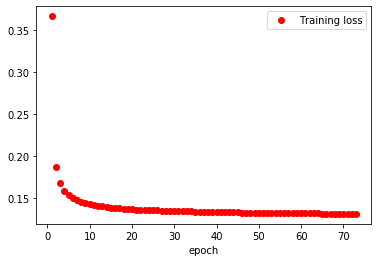

In [32]:
# To plot training loss only

loss = model_history.history['loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error', 'lr'])


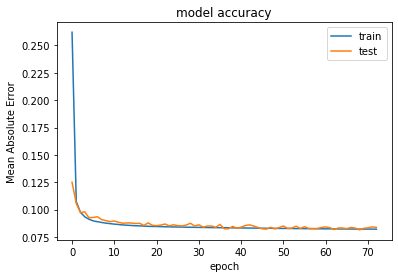

In [33]:
# list all data in history

print(model_history.history.keys())

# summarize history for accuracy
acc = model_history.history['mean_absolute_error']
val_acc = model_history.history['val_mean_absolute_error']

plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('accuracy_3_layer.pdf')
plt.show()

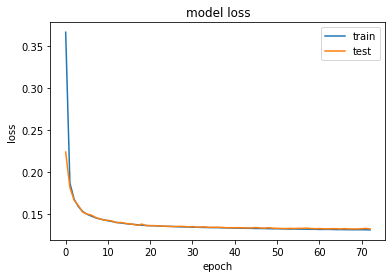

In [34]:
# summarize history for loss

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('loss_3_layer.pdf')
plt.show()

In [35]:
# Making the predictions for testing

# Predicting the Test set results
y_pred = model.predict(x_test) 
y_pred

array([[5.9306622e-06, 3.6190838e-02, 1.0842085e-03, ..., 2.9847920e-03,
        3.1510919e-02, 5.9604645e-08],
       [9.9999976e-01, 1.0976195e-04, 2.5063753e-04, ..., 2.4162856e-01,
        4.1386485e-04, 0.0000000e+00],
       [2.0613372e-03, 1.4975667e-04, 8.5914135e-04, ..., 2.5689602e-05,
        1.6590953e-04, 0.0000000e+00],
       ...,
       [9.9999809e-01, 7.4476004e-05, 5.0411654e-01, ..., 2.8884798e-01,
        1.9622356e-02, 8.9406967e-08],
       [9.9999303e-01, 4.7206879e-05, 2.7090311e-04, ..., 1.1287928e-03,
        5.2627200e-01, 0.0000000e+00],
       [0.0000000e+00, 3.2213330e-04, 2.0523667e-03, ..., 1.7222762e-04,
        5.3998828e-04, 0.0000000e+00]], dtype=float32)

In [36]:
y_test.shape


(18703, 40)

In [37]:
y_pred.shape

(18703, 40)

In [38]:
# Evaluating the model # Test error

# Measure MSE error  
mse_test = metrics.mean_squared_error(y_test, y_pred)
print("Test Mean Squared error (MSE): {}".format(mse_test))

# Measure RMSE error 
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Test Root mean squared error (RMSE): {}".format(rmse_test))

# Measure MAE error
mae_test = metrics.mean_absolute_error(y_test, y_pred)
print("Test Mean absolute error (MAE): {}".format(mae_test))

Test Mean Squared error (MSE): 0.04146675172241139
Test Root mean squared error (RMSE): 0.20363386683558163
Test Mean absolute error (MAE): 0.0817620964657452


In [39]:
# Making the predictions for training

# Predicting the Training set results
y_pred_train = model.predict(x_train) 
y_pred_train

array([[9.9999988e-01, 1.5599370e-02, 9.0257525e-03, ..., 2.3545361e-01,
        1.2655810e-01, 1.4901161e-07],
       [2.7328730e-05, 8.4158480e-03, 6.5199733e-03, ..., 9.3281269e-05,
        1.8170476e-04, 0.0000000e+00],
       [9.9999952e-01, 2.3707747e-04, 5.4224163e-02, ..., 1.7341971e-04,
        3.0887800e-01, 1.1920929e-07],
       ...,
       [1.7881393e-07, 2.8622150e-04, 8.6253881e-04, ..., 2.9533413e-01,
        1.9319603e-01, 5.9604645e-08],
       [1.7881393e-07, 4.6193600e-05, 1.7246893e-01, ..., 1.2513995e-04,
        3.8167778e-01, 0.0000000e+00],
       [9.9999917e-01, 8.5145235e-05, 2.0062417e-02, ..., 2.3202282e-01,
        3.7442267e-02, 0.0000000e+00]], dtype=float32)

In [40]:
y_pred_train.shape 

(168327, 40)

In [41]:
# Evaluating the model # Training error

# Measure MSE error  
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
print("Training Mean Squared error (MSE): {}".format(mse_train))

# Measure RMSE error 
rmse_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print("Training Root mean squared error (RMSE): {}".format(rmse_train))

# Measure MAE error
mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
print("Training Mean absolute error (MAE): {}".format(mae_train))

Training Mean Squared error (MSE): 0.040761744045230086
Training Root mean squared error (RMSE): 0.2018953789595742
Training Mean absolute error (MAE): 0.08103900973067393


In [42]:
y_pred_flat = y_pred.flatten()
y_pred_flat

array([5.9306622e-06, 3.6190838e-02, 1.0842085e-03, ..., 1.7222762e-04,
       5.3998828e-04, 0.0000000e+00], dtype=float32)

In [43]:
y_test_flat = y_test.flatten()
y_test_flat

array([ 0., -0.,  0., ...,  0.,  0.,  0.])

In [44]:
# Regression score for test

r2_score_test = metrics.r2_score(y_test_flat, y_pred_flat)
print("R2 Score Test: {}".format(r2_score_test))

R2 Score Test: 0.5831363476819516


In [45]:
y_pred_train_flat = y_pred_train.flatten()
y_pred_train_flat

array([0.9999999 , 0.01559937, 0.00902575, ..., 0.23202282, 0.03744227,
       0.        ], dtype=float32)

In [46]:
y_train_flat = y_train.flatten()
y_train_flat

array([ 1.,  0.,  0., ..., -0.,  0.,  0.])

In [47]:
# Regression score for training

r2_score_train = metrics.r2_score(y_train_flat, y_pred_train_flat)
print("R2 Score Train: {}".format(r2_score_train))

R2 Score Train: 0.5899234651096414


In [48]:
######################### Constraint verification for test data ##########################

In [49]:
y_pred = model.predict(x_test)
y_pred

array([[5.9306622e-06, 3.6190838e-02, 1.0842085e-03, ..., 2.9847920e-03,
        3.1510919e-02, 5.9604645e-08],
       [9.9999976e-01, 1.0976195e-04, 2.5063753e-04, ..., 2.4162856e-01,
        4.1386485e-04, 0.0000000e+00],
       [2.0613372e-03, 1.4975667e-04, 8.5914135e-04, ..., 2.5689602e-05,
        1.6590953e-04, 0.0000000e+00],
       ...,
       [9.9999809e-01, 7.4476004e-05, 5.0411654e-01, ..., 2.8884798e-01,
        1.9622356e-02, 8.9406967e-08],
       [9.9999303e-01, 4.7206879e-05, 2.7090311e-04, ..., 1.1287928e-03,
        5.2627200e-01, 0.0000000e+00],
       [0.0000000e+00, 3.2213330e-04, 2.0523667e-03, ..., 1.7222762e-04,
        5.3998828e-04, 0.0000000e+00]], dtype=float32)

In [50]:
x_test

array([[-0.83839253, -1.55717957, -1.00560602, ...,  1.35191339,
        -0.1859795 , -0.99071186],
       [ 0.83598577, -0.50980026,  0.99442523, ..., -0.42138119,
        -1.03891498,  0.27230524],
       [ 0.72469778, -0.30243105, -1.00560602, ...,  0.15458595,
        -1.33651337,  1.03037881],
       ...,
       [-1.01967666, -0.91888959,  0.99442523, ...,  0.734206  ,
        -0.95680813,  0.63020743],
       [-0.50905774, -0.99326947,  0.99442523, ..., -0.62017979,
        -0.46553376, -0.49650887],
       [ 1.70305562,  1.65757287, -1.00560602, ..., -1.46383166,
        -0.7196913 , -0.70956981]])

In [51]:
x_test.shape

(18703, 63)

In [52]:
y_test.shape

(18703, 40)

In [53]:
y_pred

array([[5.9306622e-06, 3.6190838e-02, 1.0842085e-03, ..., 2.9847920e-03,
        3.1510919e-02, 5.9604645e-08],
       [9.9999976e-01, 1.0976195e-04, 2.5063753e-04, ..., 2.4162856e-01,
        4.1386485e-04, 0.0000000e+00],
       [2.0613372e-03, 1.4975667e-04, 8.5914135e-04, ..., 2.5689602e-05,
        1.6590953e-04, 0.0000000e+00],
       ...,
       [9.9999809e-01, 7.4476004e-05, 5.0411654e-01, ..., 2.8884798e-01,
        1.9622356e-02, 8.9406967e-08],
       [9.9999303e-01, 4.7206879e-05, 2.7090311e-04, ..., 1.1287928e-03,
        5.2627200e-01, 0.0000000e+00],
       [0.0000000e+00, 3.2213330e-04, 2.0523667e-03, ..., 1.7222762e-04,
        5.3998828e-04, 0.0000000e+00]], dtype=float32)

In [54]:
#round-off the y_pred

import numpy as np
a_list = np.array(y_pred)
y_pred_binary = np.round(a_list)
print(y_pred_binary)



[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [55]:
y_pred_binary.shape

(18703, 40)

In [56]:
y_pred_binary

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [57]:
y_test

array([[ 0., -0.,  0., ..., -0.,  1.,  0.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0., -0., ...,  0.,  0.,  0.]])

In [58]:
len(y_pred_binary)

18703

In [59]:
inputs.shape

(187030, 63)

In [60]:
x_test

array([[-0.83839253, -1.55717957, -1.00560602, ...,  1.35191339,
        -0.1859795 , -0.99071186],
       [ 0.83598577, -0.50980026,  0.99442523, ..., -0.42138119,
        -1.03891498,  0.27230524],
       [ 0.72469778, -0.30243105, -1.00560602, ...,  0.15458595,
        -1.33651337,  1.03037881],
       ...,
       [-1.01967666, -0.91888959,  0.99442523, ...,  0.734206  ,
        -0.95680813,  0.63020743],
       [-0.50905774, -0.99326947,  0.99442523, ..., -0.62017979,
        -0.46553376, -0.49650887],
       [ 1.70305562,  1.65757287, -1.00560602, ..., -1.46383166,
        -0.7196913 , -0.70956981]])

In [61]:
x_p = pd.DataFrame(x_test)
#pi = x_p.iloc[:, 27:50]
#pi
x_p.head

<bound method NDFrame.head of              0         1         2         3        4         5         6   \
0     -0.838393 -1.557180 -1.005606  0.994413  0.99984 -1.002897  0.446322   
1      0.835986 -0.509800  0.994425  0.994413  0.99984  0.997111 -0.449168   
2      0.724698 -0.302431 -1.005606  0.994413  0.99984  0.997111  0.446322   
3     -0.620757  1.112611  0.994425 -1.005618  0.99984 -1.002897  0.446322   
4     -0.725811  1.248013 -1.005606 -1.005618  0.99984 -1.002897 -0.449168   
...         ...       ...       ...       ...      ...       ...       ...   
18698  0.672759 -1.551530  0.994425  0.994413 -1.00016 -1.002897  1.341813   
18699 -1.661818  1.389711 -1.005606 -1.005618  0.99984  0.997111 -1.344659   
18700 -1.019677 -0.918890  0.994425  0.994413 -1.00016 -1.002897 -1.344659   
18701 -0.509058 -0.993269  0.994425 -1.005618  0.99984  0.997111  1.341813   
18702  1.703056  1.657573 -1.005606  0.994413 -1.00016 -1.002897  0.446322   

             7         8         

In [62]:
#In the next cells, we are going to compute the suboptimality of the DNN solution vs others 

In [63]:
x_pi = pd.DataFrame(x_test)
x_pi = x_pi.iloc[:, 22:32]
x_pi #Saving the energy prize

,22,23,24,25,26,27,28,29,30,31
0,1.436827,1.477008,1.592472,1.407117,1.460301,-0.953531,0.590049,0.947032,-0.892796,0.912653
1,1.433092,1.075428,-1.246236,0.572912,-0.885290,-0.827791,0.850654,-1.600819,0.019092,0.007825
2,-1.669098,-1.731818,-0.590283,0.556112,0.232510,1.373958,-1.562149,0.809067,-1.140378,0.629472
3,0.349327,0.900835,-0.068693,-0.946797,-0.446211,1.063818,1.044286,0.470062,-1.183769,0.811963
4,0.286691,-1.122938,0.989075,-0.865415,1.711368,1.331934,-1.526390,0.659634,1.010912,0.071081
...,...,...,...,...,...,...,...,...,...,...
18698,1.400138,-1.462493,-0.661555,1.214181,-0.846511,1.493603,-1.356181,1.416009,1.731667,1.623033
18699,-1.273182,-1.661704,1.148288,-0.767310,0.957281,1.031519,0.170165,-0.536493,-0.372901,1.057017
18700,-0.136444,-0.823294,-0.850133,-0.024660,0.218852,0.501712,-1.677787,-0.852735,-0.788099,0.371247
18701,0.218510,0.868166,1.605128,-1.526221,0.708599,1.144044,-1.450359,1.642939,-0.793597,-0.311751


In [64]:
#saving the test and predicted switching
y_test= pd.DataFrame(y_test)
y_train= pd.DataFrame(y_train)
y_pred= pd.DataFrame(y_pred)
y_pred


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000006,0.036191,0.001084,0.417521,0.015894,0.130103,0.380297,0.002662,0.010086,2.384186e-07,...,1.490116e-07,0.054377,0.000427,0.624760,0.020878,0.086539,0.362347,0.002985,0.031511,5.960464e-08
1,1.000000,0.000110,0.000251,0.193257,0.016395,0.001994,0.006163,0.331242,0.000261,0.000000e+00,...,9.999942e-01,0.000248,0.000351,0.441322,0.029269,0.004158,0.009929,0.241629,0.000414,0.000000e+00
2,0.002061,0.000150,0.000859,0.000052,0.003292,0.286300,0.386616,0.000127,0.000057,0.000000e+00,...,9.999985e-01,0.000232,0.000825,0.000057,0.003473,0.188852,0.132029,0.000026,0.000166,0.000000e+00
3,0.999999,0.000059,0.347226,0.000464,0.254375,0.034518,0.007791,0.197208,0.159063,0.000000e+00,...,4.179180e-04,0.000185,0.218987,0.000312,0.170964,0.043078,0.005081,0.173281,0.239430,2.980232e-08
4,0.000001,0.000086,0.482813,0.117094,0.000469,0.048661,0.657871,0.000376,0.064168,5.960464e-08,...,4.321337e-06,0.000195,0.384965,0.177739,0.000853,0.031438,0.400836,0.000111,0.089682,8.940697e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18698,0.999999,0.019072,0.002544,0.403452,0.001213,0.000084,0.176048,0.000062,0.000038,0.000000e+00,...,1.680851e-05,0.015794,0.003468,0.468044,0.000569,0.000069,0.136990,0.000019,0.000203,0.000000e+00
18699,0.000126,0.024359,0.294195,0.076449,0.191808,0.177252,0.220510,0.081384,0.093044,3.129244e-06,...,9.999998e-01,0.050630,0.373681,0.080933,0.276470,0.255721,0.314108,0.160489,0.237268,3.159046e-06
18700,0.999998,0.000074,0.504117,0.004228,0.017080,0.109707,0.453632,0.118613,0.003104,5.960464e-08,...,4.866421e-04,0.000159,0.275143,0.006447,0.015791,0.082032,0.300696,0.288848,0.019622,8.940697e-08
18701,0.999993,0.000047,0.000271,0.151443,0.000119,0.003161,0.000233,0.000808,0.060348,0.000000e+00,...,9.999998e-01,0.000025,0.000038,0.624365,0.000078,0.001211,0.000117,0.001129,0.526272,0.000000e+00


In [65]:
'''
x_p = pd.DataFrame(inputs.values)            #Energy price of inputs
x_p = x_p.iloc[65544:81881, 18:50]            # Saving the Energy price
x_p.index = range(len(x_p))
x_p.columns = range(x_p.shape[1])


y_test= pd.DataFrame(y_test)
y_test = y_test.iloc[0:16377, 0:14]
y_test.index = range(len(y_test))
y_test.columns = range(y_test.shape[1])

y_pred= pd.DataFrame(y_pred_binary)
y_pred = y_pred.iloc[0:16377, 0:14]
y_pred.index = range(len(y_pred))
y_pred.columns = range(y_pred.shape[1])
'''
#testing = pd.concat([x_pi, y_test, y_pred], axis=1)
#testing.to_excel('testing.xlsx', index = False)

'\nx_p = pd.DataFrame(inputs.values)            #Energy price of inputs\nx_p = x_p.iloc[65544:81881, 18:50]            # Saving the Energy price\nx_p.index = range(len(x_p))\nx_p.columns = range(x_p.shape[1])\n\n\ny_test= pd.DataFrame(y_test)\ny_test = y_test.iloc[0:16377, 0:14]\ny_test.index = range(len(y_test))\ny_test.columns = range(y_test.shape[1])\n\ny_pred= pd.DataFrame(y_pred_binary)\ny_pred = y_pred.iloc[0:16377, 0:14]\ny_pred.index = range(len(y_pred))\ny_pred.columns = range(y_pred.shape[1])\n'

In [66]:
concat_x_pi =  pd.concat([x_pi, x_pi, x_pi, x_pi], ignore_index=True, axis=1)
concat_x_pi= pd.DataFrame(concat_x_pi)
#concat_x_pi.index = new_index
concat_x_pi = concat_x_pi.T


In [67]:
concat_x_pi = abs(concat_x_pi)
concat_x_pi.shape

(40, 18703)

In [68]:
y_pred.shape


(18703, 40)

In [69]:
y_pred = y_pred

In [70]:
y_pred

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.000006,0.036191,0.001084,0.417521,0.015894,0.130103,0.380297,0.002662,0.010086,2.384186e-07,...,1.490116e-07,0.054377,0.000427,0.624760,0.020878,0.086539,0.362347,0.002985,0.031511,5.960464e-08
1,1.000000,0.000110,0.000251,0.193257,0.016395,0.001994,0.006163,0.331242,0.000261,0.000000e+00,...,9.999942e-01,0.000248,0.000351,0.441322,0.029269,0.004158,0.009929,0.241629,0.000414,0.000000e+00
2,0.002061,0.000150,0.000859,0.000052,0.003292,0.286300,0.386616,0.000127,0.000057,0.000000e+00,...,9.999985e-01,0.000232,0.000825,0.000057,0.003473,0.188852,0.132029,0.000026,0.000166,0.000000e+00
3,0.999999,0.000059,0.347226,0.000464,0.254375,0.034518,0.007791,0.197208,0.159063,0.000000e+00,...,4.179180e-04,0.000185,0.218987,0.000312,0.170964,0.043078,0.005081,0.173281,0.239430,2.980232e-08
4,0.000001,0.000086,0.482813,0.117094,0.000469,0.048661,0.657871,0.000376,0.064168,5.960464e-08,...,4.321337e-06,0.000195,0.384965,0.177739,0.000853,0.031438,0.400836,0.000111,0.089682,8.940697e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18698,0.999999,0.019072,0.002544,0.403452,0.001213,0.000084,0.176048,0.000062,0.000038,0.000000e+00,...,1.680851e-05,0.015794,0.003468,0.468044,0.000569,0.000069,0.136990,0.000019,0.000203,0.000000e+00
18699,0.000126,0.024359,0.294195,0.076449,0.191808,0.177252,0.220510,0.081384,0.093044,3.129244e-06,...,9.999998e-01,0.050630,0.373681,0.080933,0.276470,0.255721,0.314108,0.160489,0.237268,3.159046e-06
18700,0.999998,0.000074,0.504117,0.004228,0.017080,0.109707,0.453632,0.118613,0.003104,5.960464e-08,...,4.866421e-04,0.000159,0.275143,0.006447,0.015791,0.082032,0.300696,0.288848,0.019622,8.940697e-08
18701,0.999993,0.000047,0.000271,0.151443,0.000119,0.003161,0.000233,0.000808,0.060348,0.000000e+00,...,9.999998e-01,0.000025,0.000038,0.624365,0.000078,0.001211,0.000117,0.001129,0.526272,0.000000e+00


In [71]:
result_predict = y_pred.dot(concat_x_pi);
result_predict.shape

(18703, 18703)

In [72]:
result_test = y_test.dot(concat_x_pi);
result_test.shape

(18703, 18703)

In [73]:
sub = abs(result_test - result_predict)


In [74]:
sub

,0,1,2,3,4,5,6,7,8,9,...,18693,18694,18695,18696,18697,18698,18699,18700,18701,18702
0,0.332843,0.781165,0.335104,0.247813,0.476768,0.339251,0.366489,0.413989,1.673105,0.871970,...,1.883984,1.059762,0.561775,0.312994,1.770565,0.523233,0.508952,1.280159,0.663477,0.616355
1,0.810679,0.253849,0.292522,0.571229,0.409513,0.088831,0.976229,0.185721,0.805611,0.582779,...,0.862572,0.977743,0.107466,0.524658,0.527838,0.684995,0.428521,0.066911,0.902183,0.276915
2,0.107618,0.033278,0.042741,0.064775,0.028449,0.070751,0.074028,0.002700,0.215261,0.048567,...,0.171956,0.041027,0.019988,0.174838,0.126515,0.106255,0.211984,0.194384,0.002866,0.011494
3,0.039062,0.916379,0.228072,0.152207,0.242725,0.511517,0.321316,0.754250,0.122528,0.003637,...,0.833018,0.112734,0.542163,0.423181,0.962547,0.196058,0.108678,0.313286,0.776387,0.305995
4,0.081191,0.380902,0.004306,0.483265,0.055566,0.527363,0.769828,0.287320,0.950779,0.119282,...,0.183917,0.468384,0.662632,0.203774,0.060137,0.429334,0.010784,0.527298,0.070166,0.483386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18698,0.496388,0.358081,0.545730,0.543886,0.643331,0.313730,0.844132,0.141441,0.371795,0.751733,...,0.840324,0.902702,0.167855,0.623517,0.690771,0.682362,0.183207,0.466566,0.819513,0.302390
18699,0.539168,0.232987,1.013832,0.599607,0.542195,0.032452,0.035457,0.240297,0.457835,0.447678,...,0.776169,0.092778,0.593054,0.764750,0.130515,0.643037,1.025001,0.069173,0.655730,0.238991
18700,0.405218,0.368520,0.170784,0.169675,0.044842,0.309284,0.009397,0.419108,0.557256,0.015083,...,0.957718,0.033321,0.078869,0.182209,1.278280,0.411791,0.792356,0.727891,0.343714,0.271005
18701,0.819095,0.470048,0.032799,0.331925,0.334026,0.109227,0.665019,0.332922,0.597733,0.624015,...,1.193448,1.110179,0.064395,0.769630,0.744833,0.347980,0.492912,0.272024,0.956552,0.433828


In [75]:
sub = abs(result_test - result_predict)/(result_test)
sub

,0,1,2,3,4,5,6,7,8,9,...,18693,18694,18695,18696,18697,18698,18699,18700,18701,18702
0,0.044177,0.160770,0.048114,0.051203,0.102596,0.147513,0.054325,0.091143,0.204046,0.121180,...,0.339247,0.164770,0.308045,0.076427,0.470762,0.061892,0.092783,0.794135,0.122253,0.169957
1,0.085258,0.029939,0.034023,0.151884,0.115772,0.034553,0.198513,0.020718,0.078075,0.068753,...,0.101838,0.153506,0.039779,0.142449,0.095279,0.072525,0.059817,0.046215,0.161989,0.048188
2,0.018383,0.005567,0.005381,0.020524,0.007651,0.034246,0.018356,0.000480,0.039830,0.006373,...,0.034676,0.007605,0.007984,0.059440,0.033876,0.015071,0.042218,0.075086,0.000882,0.002822
3,0.005728,0.182662,0.043021,0.063490,0.056649,0.161384,0.127098,0.146082,0.020647,0.000706,...,0.187635,0.048486,0.148123,0.164575,0.429127,0.032460,0.021628,0.147085,0.219050,0.068444
4,0.013994,0.067693,0.000721,0.187655,0.010449,0.101208,0.238309,0.065344,0.534861,0.020073,...,0.027343,0.109103,0.132986,0.061897,0.012724,0.078985,0.002758,0.101554,0.011086,0.091310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18698,0.079069,0.073639,0.090765,0.149562,0.167945,0.163946,0.160156,0.031394,0.064120,0.111705,...,0.130004,0.144055,0.107552,0.185651,0.154191,0.103627,0.043096,0.233284,0.165899,0.081457
18699,0.054795,0.029983,0.101695,0.110910,0.065593,0.005728,0.006402,0.033785,0.057584,0.047138,...,0.104350,0.014894,0.086702,0.144557,0.022020,0.062115,0.129941,0.013477,0.093583,0.038630
18700,0.053303,0.052368,0.022909,0.057631,0.008289,0.063018,0.002602,0.069180,0.134260,0.002084,...,0.143511,0.006899,0.015048,0.047247,0.295243,0.059054,0.131084,0.175283,0.055068,0.044153
18701,0.123910,0.096099,0.004893,0.104427,0.122068,0.062965,0.154507,0.060528,0.082100,0.102302,...,0.266501,0.261888,0.048135,0.500115,0.293502,0.048694,0.099382,0.222589,0.321493,0.120928


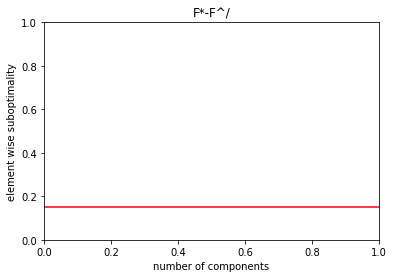

In [76]:
suboptimality = np.diag(sub)
#plt.plot(suboptimality[48:72])
plt.xlabel('number of components')
plt.ylabel('element wise suboptimality')
plt.title('F*-F^/')
plt.axhline(y=0.15, color='r', linestyle='-')

In [77]:
suboptimality.shape

(18703,)

In [78]:
#Calculating the suboptimality for T=10, two tank model, batch normalization, activation = sigmoid, ReLu
#loss= binary cross entropy, pumps =4 
T = np.mean(suboptimality)
T

0.13981318016718886